In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

from sklearn.neighbors import KNeighborsClassifier
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import pandas as pd
import transformers
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny2")
# model.cuda()  # uncomment it if you have a GPU


In [ ]:
data = pd.read_csv('mists01.csv')

In [ ]:
data.head(5)

,0,Мне очень приятно.
0,1.0,"Озера в Швейцарии не большие, но типично краси..."
1,1.0,Закройте банки и переворошите банки.
2,0.0,Так как есть разные страны у каждой страны сво...
3,1.0,"Я написал с Либреофисом, не с Вордом - значит ..."
4,0.0,"Поскольку завтра мне (будет?) некогда, вот то,..."


In [ ]:
data = data.dropna()


display(data)

,0,Мне очень приятно.
0,1.0,"Озера в Швейцарии не большие, но типично краси..."
1,1.0,Закройте банки и переворошите банки.
2,0.0,Так как есть разные страны у каждой страны сво...
3,1.0,"Я написал с Либреофисом, не с Вордом - значит ..."
4,0.0,"Поскольку завтра мне (будет?) некогда, вот то,..."
...,...,...
2798,1.0,В настоящем времени когда информаций турбулент...
2799,1.0,"Я абсолютно понимаю, нелегко дать адрес или не..."
2800,0.0,Она тоже не очень красивая.
2801,0.0,"Ты можешь также увидеть, какие слова я не знал..."


0.0    1629
1.0    1169
Name: 0, dtype: int64


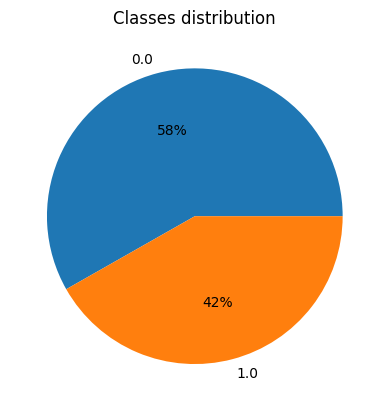

In [ ]:
classes = pd.value_counts(data["0"])

print(classes)

classes.plot(kind = 'pie',  autopct='%0.f%%')
# про string formatting https://realpython.com/python-string-formatting/

plt.title("Classes distribution")

plt.ylabel('')

plt.show()

In [ ]:
count1 = Counter(" ".join(data[data['0']=='0.0']["Мне очень приятно."]).lower().split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1) # новый дф
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})

# тот же набор операций для второго подкорпуса


display(df1)

""


In [ ]:
!pip install pymorphy2
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv('mists1.csv');
data

,content,context,лекс,false friend,выдуманные слова,вид глагола,возвратные глаголы,форма глагола,падеж,число,род,склонение,краткие прилагательные,местоимение,предложно-падежная форма,предлоги,орф,синт
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,номер чистили,"Номер чистили каждый день, и каждый день можно...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,относительно расположений,Отрицательные пункты в основном относительно р...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,искать коалиции,"Чтобы делать гостям легче, можно, например, ис...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,классические ученики,Классические ученики учили классические предме...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,впервые нужно объяснить разницу,Впервые нужно объяснить разницу между интеграц...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1171,тише ездят на работу,"Люди, которые встают раньше, обычно тише ездят...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1172,попросить вас о ценах,Я хотел попросить вас о ценах,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1173,Швейцария под сильное влияние,"Это не чудо, была Швейцария под сильное влияни...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [1]:
import os
import tensorflow_hub as hub
import tensorflow as tf
#Elmo
elmo = hub.load("https://tfhub.dev/google/elmo/2").signatures["default"]

# Provide input tensor and create embeddings
input_tensor = ['мама мыла раму']
embeddings_tensor = elmo(tf.constant(input_tensor))["elmo"]  #, signature="default", as_dict=True)

#with tf.Session() as sess:
   # sess.run(tf.global_variables_initializer())
    #embeddings = sess.run(embeddings_tensor)
print(embeddings_tensor.shape)
print(embeddings_tensor)

(1, 3, 1024)
tf.Tensor(
[[[-0.21613553 -0.66482663  0.08229108 ...  0.14300808  0.35989505
    0.20064926]
  [-0.22314677 -0.23650715 -0.00162385 ... -0.30131966  0.01609503
    0.08038223]
  [-0.27045673 -0.63243127 -0.5056797  ... -0.08239976  0.3363203
    0.00805671]]], shape=(1, 3, 1024), dtype=float32)


In [2]:
def vectorize_my_sent(input_tensor):
   vector = embeddings_tensor = elmo(tf.constant(input_tensor))["elmo"]
   return vector

In [3]:
import pandas as pd
data = pd.read_csv('data.csv');
data

,label1,label2,label3,label4,label5,label6,label7,label8,content
0,1,0,0,0,0,0,0,0,"Номер чистили каждый день, и каждый день можно..."
1,0,0,1,1,0,0,0,0,Отрицательные пункты в основном относительно р...
2,1,0,0,0,0,0,0,0,"Чтобы делать гостям легче, можно, например, ис..."
3,1,0,0,0,0,0,0,0,Классические ученики учили классические предме...
4,0,1,0,0,0,0,0,0,Глагол научиться для меня чаще всего связан с ...
...,...,...,...,...,...,...,...,...,...
2789,0,0,0,0,0,0,0,0,"Я считаю, что всегда есть другие возможности."
2790,0,0,0,0,0,0,0,0,И часто преступники получают их наказании – мо...
2791,0,0,0,0,0,0,0,0,"(Марианне Бахмайер умерла от рака, когда ей 46..."
2792,0,0,0,0,0,0,0,0,"Я считаю, лучше соблюдать закон."


In [4]:
print(f"размер оригинального датасета:{data.shape},\
        \nразмер датасета без NaN:{data.dropna().shape}")

размер оригинального датасета:(2794, 9),        
размер датасета без NaN:(2791, 9)


In [5]:
print(f"размер оригинального датасета:{data.shape},\
        \nразмер датасета без NaN:{data.fillna(0).shape}")

# проверяем присутствие NaN
data.fillna(0).isna().any()

размер оригинального датасета:(2794, 9),        
размер датасета без NaN:(2794, 9)


label1     False
label2     False
label3     False
label4     False
label5     False
label6     False
label7     False
label8     False
content    False
dtype: bool

In [6]:
df = pd.read_csv('df.csv');
df

,"Номер чистили каждый день, и каждый день можно было получить чистую простыню."
0,Отрицательные пункты в основном относительно р...
1,"Чтобы делать гостям легче, можно, например, ис..."
2,Классические ученики учили классические предме...
3,Глагол научиться для меня чаще всего связан с ...
4,"Здесь, если позвольте, мой отчёт и несколько п..."
...,...
2785,"Я считаю, что всегда есть другие возможности."
2786,И часто преступники получают их наказании – мо...
2787,"(Марианне Бахмайер умерла от рака, когда ей 46..."
2788,"Я считаю, лучше соблюдать закон."


In [7]:
df = df.rename(columns={'Номер чистили каждый день, и каждый день можно было получить чистую простыню.': 'content'})

In [8]:
df.describe()

,content
count,2790
unique,2444
top,Наши три дочери родились в две тысяча первом г...
freq,6


In [9]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [10]:
input_text = list(df.content.values)

In [11]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(input_text)]

# посмотрим на пример разметки
documents[10]

TaggedDocument(words='Всем понравились посещения у нас в отеле.', tags=[10])

In [12]:
input_text[9]

'Нужно перепланировать обслуживание, персонал, рекламу итп.'

In [51]:
model_D2V = Doc2Vec(documents, vector_size=5, window=1, min_count=5, workers=5)

In [52]:
model_D2V.save("D2V.model")

In [41]:
# индекс [] около documents -- это индекс текста из датасета
model_D2V.dv[documents[1].tags[0]]

array([-0.03630207, -0.13891327, -0.06645754, -0.16946103, -0.02740729],
      dtype=float32)

In [42]:
vectors = []
for x in documents:
    vec = list(model_D2V.dv[x.tags][0])
    vectors.append(vec)

In [53]:
split_df = pd.DataFrame(vectors,
                        columns=['v1', 'v2', 'v3', 'v4', 'v5'])

split_df

,v1,v2,v3,v4,v5
0,-0.128505,0.022535,-0.124143,-0.029575,0.033769
1,-0.036302,-0.138913,-0.066458,-0.169461,-0.027407
2,-0.000293,0.059799,-0.071397,-0.091602,-0.090068
3,-0.076425,0.010136,0.068260,-0.079302,-0.031497
4,-0.177712,0.077080,-0.019856,-0.010774,0.144866
...,...,...,...,...,...
2785,0.085297,0.152148,0.003983,-0.027399,0.088611
2786,-0.432824,0.254282,0.035249,0.125468,0.174059
2787,0.102563,-0.070505,-0.002127,-0.357799,-0.181721
2788,-0.203603,0.058411,-0.103812,-0.077682,-0.148257


In [54]:
data= data.merge(split_df, how='left')
print(data.shape)
data.head()

(2794, 14)


,label1,label2,label3,label4,label5,label6,label7,label8,content,v1,v2,v3,v4,v5
0,1,0,0,0,0,0,0,0,"Номер чистили каждый день, и каждый день можно...",-0.091450,-0.037426,-0.227570,-0.024307,NaN
1,0,0,1,1,0,0,0,0,Отрицательные пункты в основном относительно р...,-0.016226,-0.059254,-0.263712,-0.106513,NaN
2,1,0,0,0,0,0,0,0,"Чтобы делать гостям легче, можно, например, ис...",-0.179645,0.059732,0.032775,0.124736,NaN
3,1,0,0,0,0,0,0,0,Классические ученики учили классические предме...,-0.156282,-0.112005,-0.105297,-0.015621,NaN
4,0,1,0,0,0,0,0,0,Глагол научиться для меня чаще всего связан с ...,0.031357,0.151012,-0.287911,0.099368,NaN


In [30]:
data.head()

,label1,label2,label3,label4,label5,label6,label7,label8,content,v1,v2,v3,v4
0,1,0,0,0,0,0,0,0,"Номер чистили каждый день, и каждый день можно...",-0.091450,-0.037426,-0.227570,-0.024307
1,0,0,1,1,0,0,0,0,Отрицательные пункты в основном относительно р...,-0.016226,-0.059254,-0.263712,-0.106513
2,1,0,0,0,0,0,0,0,"Чтобы делать гостям легче, можно, например, ис...",-0.179645,0.059732,0.032775,0.124736
3,1,0,0,0,0,0,0,0,Классические ученики учили классические предме...,-0.156282,-0.112005,-0.105297,-0.015621
4,0,1,0,0,0,0,0,0,Глагол научиться для меня чаще всего связан с ...,0.031357,0.151012,-0.287911,0.099368


In [47]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
split_df_scaled=split_df.copy()
split_df_scaled[split_df_scaled.columns]=std_scaler.fit_transform(split_df_scaled)

In [55]:
split_df_scaled.head(3)

,v1,v2,v3,v4,v5
0,-0.971753,-0.681365,-1.287859,0.608643,0.401190
1,-0.248968,-2.183764,-0.810785,-0.505819,-0.101784
2,0.033312,-0.334603,-0.851636,0.114478,-0.616958


In [49]:
# imports here
import pandas as pd
import numpy as np

#viz
import seaborn as sns
import matplotlib.pyplot as plt

# progress bar
from tqdm import tqdm

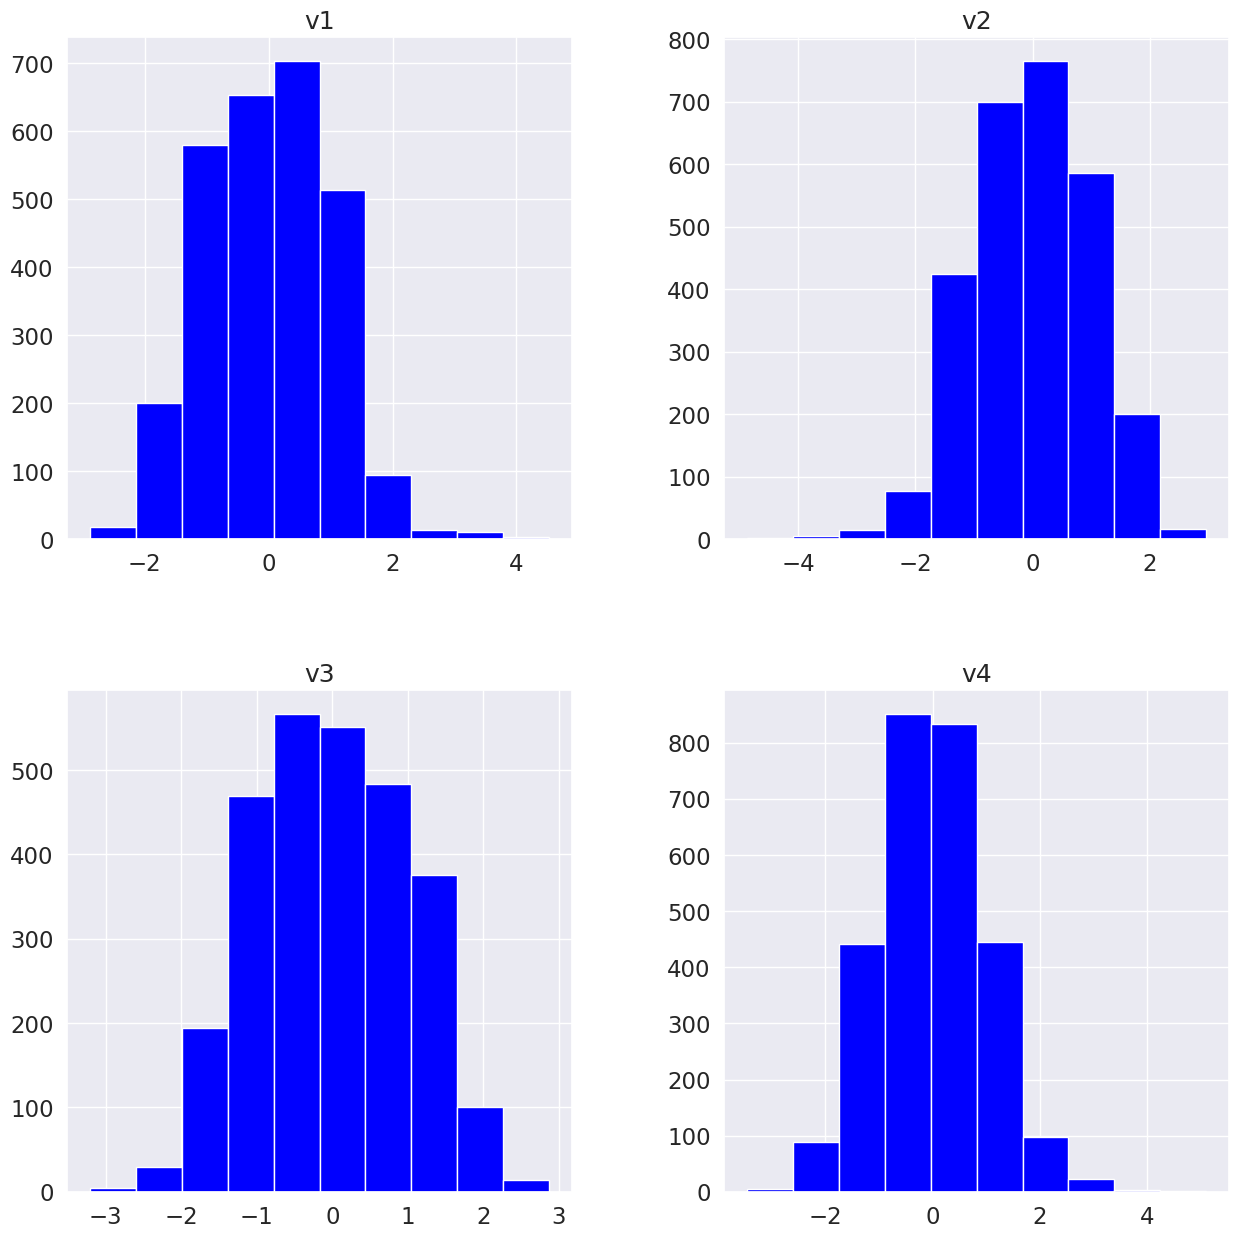

In [34]:
sns.set(font_scale=1.5, rc={'figure.figsize':(15,15)})

ax=split_df_scaled.hist(color='blue' )

In [35]:
split_df_scaled.isna().any()

v1    False
v2    False
v3    False
v4    False
dtype: bool

<Axes: >

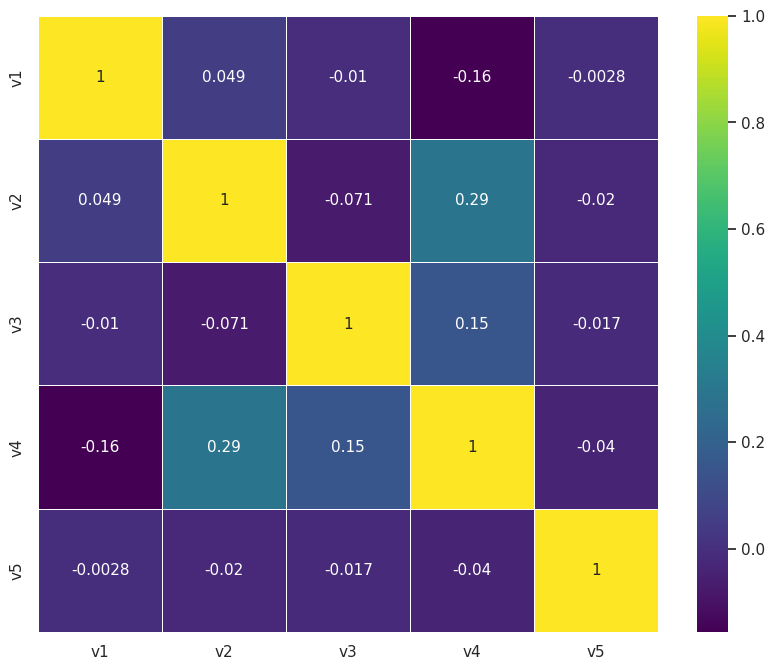

In [63]:
corr = split_df_scaled.corr() # по дефолту корреляция Пирсона

plt.figure(figsize=(10,8))

sns.heatmap(corr, linewidths=.5, cmap='viridis', annot=True,annot_kws={"size": 11})

In [37]:
from sklearn.decomposition import PCA
pca_2 = PCA(2) # задали количество компонент

pca_2_result = pca_2.fit_transform(split_df_scaled)

pca_2_result.shape

(2790, 2)

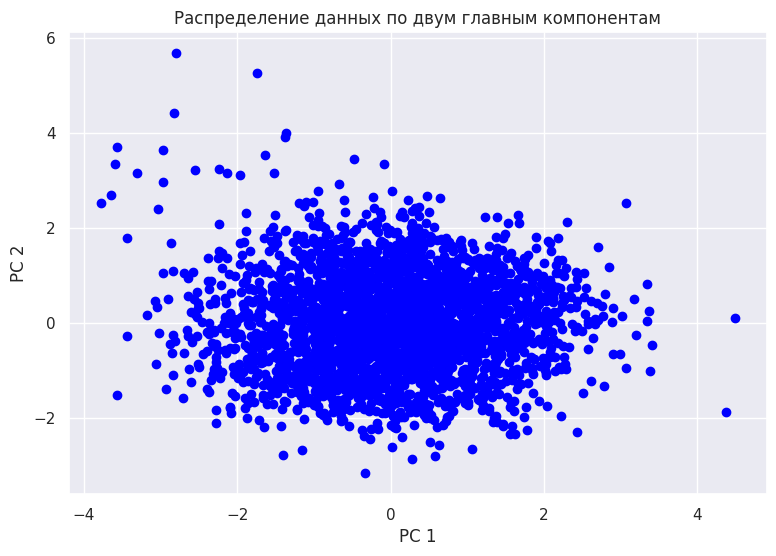

In [56]:
sns.set(rc={'figure.figsize':(9,6)},font_scale=1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='blue') # 0 и 1 - индексы колонок
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Распределение данных по двум главным компонентам')
plt.show()

In [87]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 8,
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17 # сколько раз датасет перемешан перед кластеризацией
    )


kmeans.fit(pca_2_result) # обучаем модель
print(kmeans.inertia_) # значение инерции для k=2: насколько хорошим было разбиение на 2 кластера

1694.249267578125


In [100]:
import sklearn.cluster as cluster


inertia = {}  # сюда будем сохранять значения метрики
for i in tqdm(range(2,10)): # значения интервала - число кластеров (можно изменять)

    kmeans = cluster.KMeans(
               n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17 # сколько раз датасет перемешан перед кластеризацией
    )


    kmeans.fit(pca_2_result) # обучаем модель

    # попарно,  как {ключ:значение} в словаре, сохраним {число кластеров : значение инерции}
    inertia[i]= kmeans.inertia_

100%|██████████| 8/8 [00:08<00:00,  1.12s/it]


In [101]:
inertia

{2: 4445.22900390625,
 3: 3028.79248046875,
 4: 2354.24072265625,
 5: 1972.9305419921875,
 6: 1694.249267578125,
 7: 1471.4837646484375,
 8: 1301.498779296875,
 9: 1171.681884765625}

In [90]:
from sklearn.metrics import silhouette_score

# все как в предыдущей ячейке, только силуэт-скоры сохраняем как значения в словаре
silhouette = {}
for i in tqdm(range(2,9)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_2_result)

    silhouette[i] = silhouette_score(pca_2_result, kmeans.labels_, metric='euclidean')

100%|██████████| 7/7 [00:03<00:00,  2.16it/s]


In [91]:
silhouette

{2: 0.32980126,
 3: 0.34693196,
 4: 0.3311599,
 5: 0.3265593,
 6: 0.3202334,
 7: 0.32193598,
 8: 0.33175087}

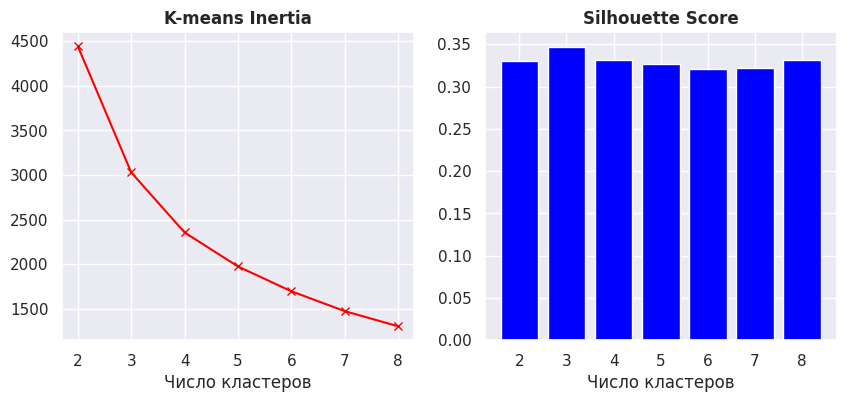

In [62]:
sns.set(font_scale=1, rc={'figure.figsize':(10,4)})

plt.subplot(1, 2, 1) # аргументы: nrows, ncols, index

plt.plot(range(2,len(inertia)+2), list(inertia.values()), marker='x',color='red')
# первый параметр = x (число шагов= числу кластеров), второй = y (инерция)

plt.xlabel('Число кластеров')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2) # аргументы: nrows, ncols, index

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'blue')
plt.xticks(range(len(silhouette)), list(silhouette.keys())) # отметки на шкале
plt.grid(True)
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Число кластеров')


plt.show()